# Problem Statement

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.In this we have to perform few data analysis using pandas,numpy and visualization libraries. In this few task has been completed like which team has won more number of times,at which venue more number of matches has been played and few other relevant task has been done.The Dataset is download from kaggle and contains around 6 csv's but For the current analysis we will be using only matches Played Data i.e matches.csv.

# Import Relevant Libraries

In [58]:
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df=pd.read_csv('matches.csv')

In [60]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [62]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [63]:
df['city'].nunique()

32

# Cleaning unnecessary data

We wont be using the Umpires Columns ('umpire1', 'umpire2', 'umpire3') in this analysis so we will remove those fields using .drop() method

In [64]:
df.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [65]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [66]:
df['winner'].nunique()

15

In [67]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [68]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

As the teams names get changed as per the season we need to replace those names for all required teams.

In [69]:
df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

In [70]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [71]:
df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [72]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [73]:
df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

Checking the position of null values

In [74]:
null_df = df[df.isna().any(axis=1)]

In [75]:
null_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [76]:
df.loc[460:470]


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium


In [77]:
df.loc[[461,462,466,468,469,474,476],'city'] = "Dubai"

In [78]:
df.loc[461:480]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
463,464,IPL-2014,Sharjah,20-04-2014,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium
464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium
465,466,IPL-2014,Sharjah,22-04-2014,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
467,468,IPL-2014,Sharjah,24-04-2014,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
470,471,IPL-2014,Abu Dhabi,26-04-2014,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium


In [79]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

Now we will analyse different types of data


In [80]:
df['id'].count()

756

# Few relevant task

# Checking for how many matches the result is normal or tie.

So now we can see that there are around 756 matches has been played. Now we have to find for how many matches the result is normal or tie.


In [95]:
regular_matches= df[df['result']== 'normal'].count()

In [96]:
regular_matches

id                 743
Season             743
city               743
date               743
team1              743
team2              743
toss_winner        743
toss_decision      743
result             743
dl_applied         743
winner             743
win_by_runs        743
win_by_wickets     743
player_of_match    743
venue              743
dtype: int64

So we can see there are around 13 matches whose result is tie or not played. Rest all matches are played normal i.e 743.

In [97]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

Now let see how many matches has been played in each cities

In [98]:
cities=df.groupby('city')[['id']].count()

In [99]:
cities

,id
city,
Abu Dhabi,7
Ahmedabad,12
Bengaluru,80
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,46
Chennai,57
Cuttack,7


Arranging data in organised manner

In [100]:
cities.rename(columns={'id':'matches'},inplace=True)
cities = cities.sort_values('matches',ascending=True).reset_index()
cities

,city,matches
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4
5,Kochi,5
6,Raipur,6
7,Sharjah,6
8,Abu Dhabi,7
9,Ranchi,7


# Importing Visualization Library

Performing visualization on number of matches played in each city

In [102]:
import seaborn as sns

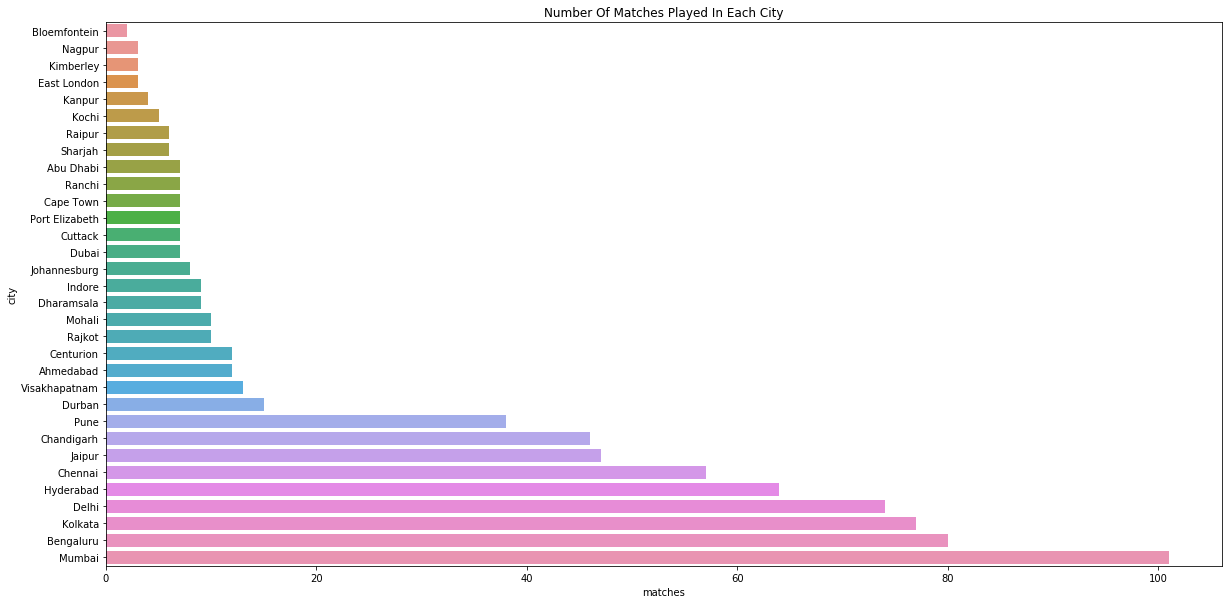

In [103]:
plt.figure(figsize=(20,10))
plt.title('Number Of Matches Played In Each City')
sns.barplot(x='matches',y='city',data=cities)

# Now we will see total matches won by each team.

In [104]:
df.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [105]:
winner_df = df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False).reset_index()

winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner_df

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


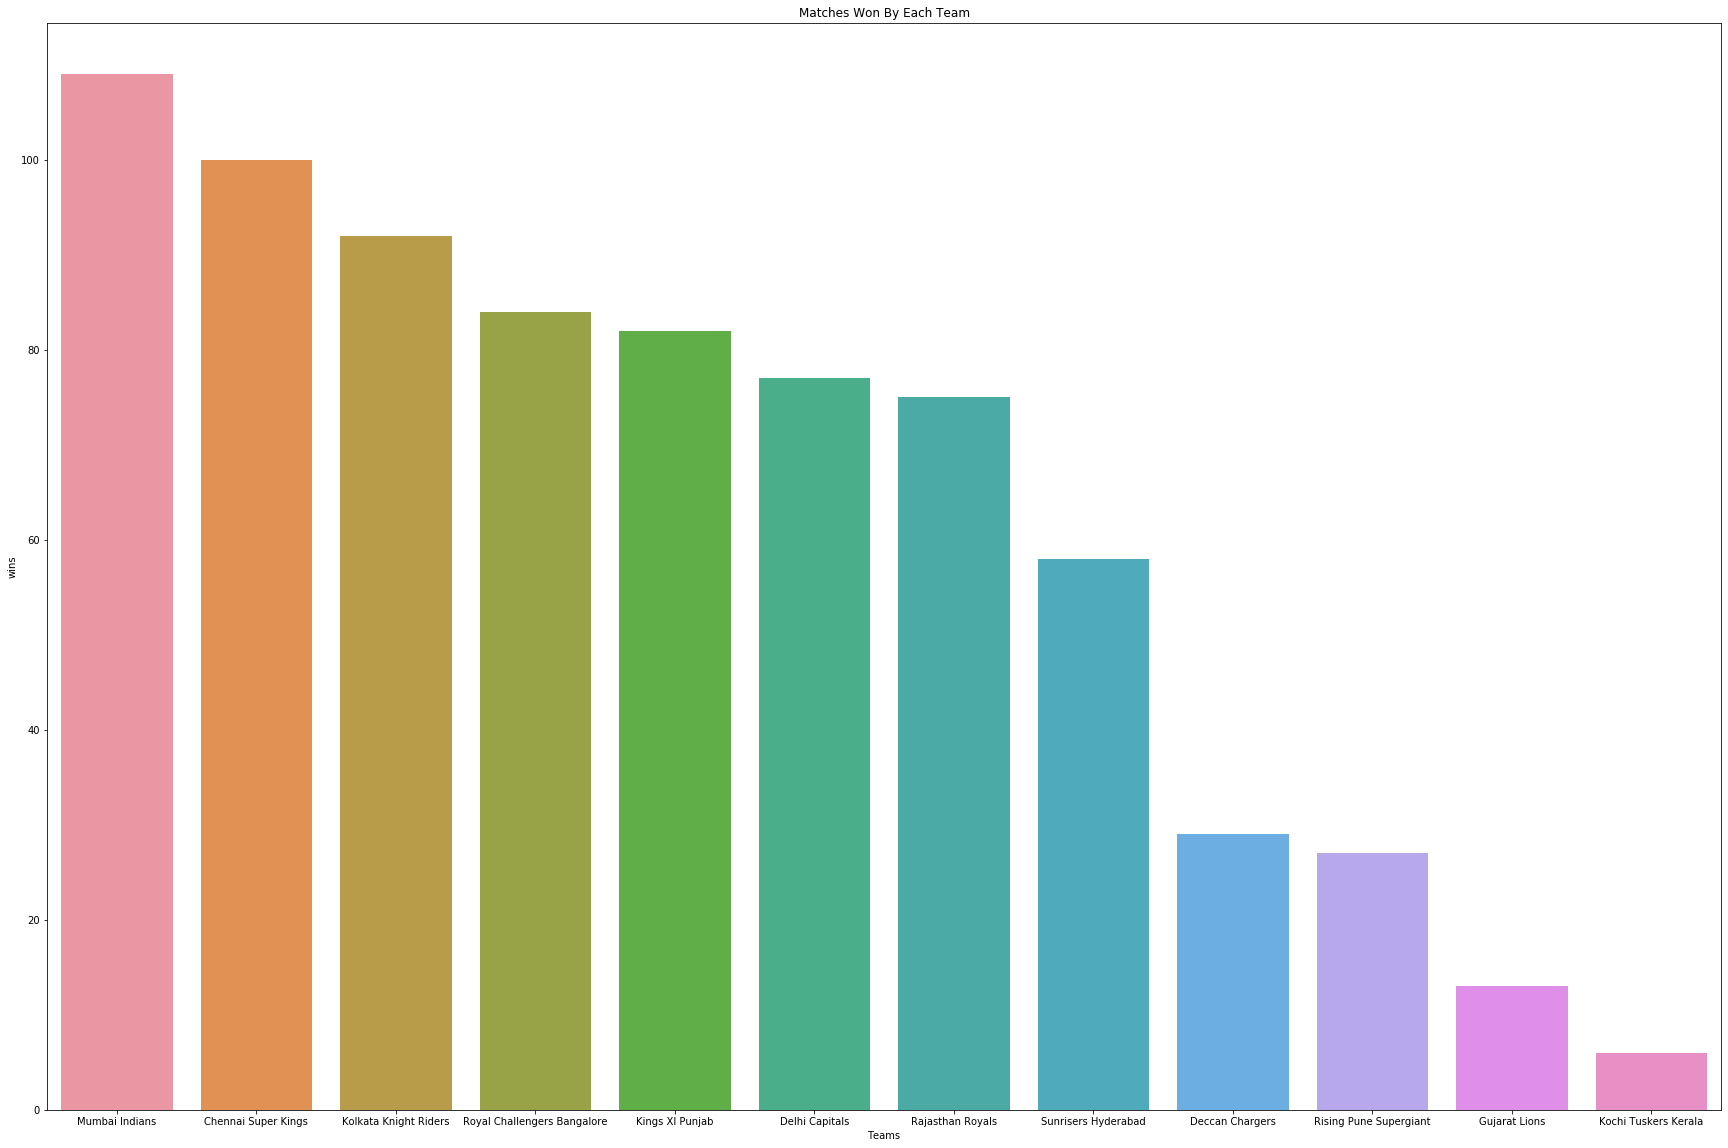

In [109]:
plt.figure(figsize=(30,20))
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.title('Matches Won By Each Team')
sns.barplot(x='Teams',y='wins',data=winner_df)

# Now we will see the season with most number of matches

In [110]:
season_df = df.groupby('Season')[['id']].count()
season_df = season_df.sort_values('Season', ascending=False).reset_index()
season_df.rename(columns = {'id':'Matches','Season':'Year'},inplace = True)

In [111]:
season_df

,Year,Matches
0,IPL-2019,60
1,IPL-2018,60
2,IPL-2017,59
3,IPL-2016,60
4,IPL-2015,59
5,IPL-2014,60
6,IPL-2013,76
7,IPL-2012,74
8,IPL-2011,73
9,IPL-2010,60


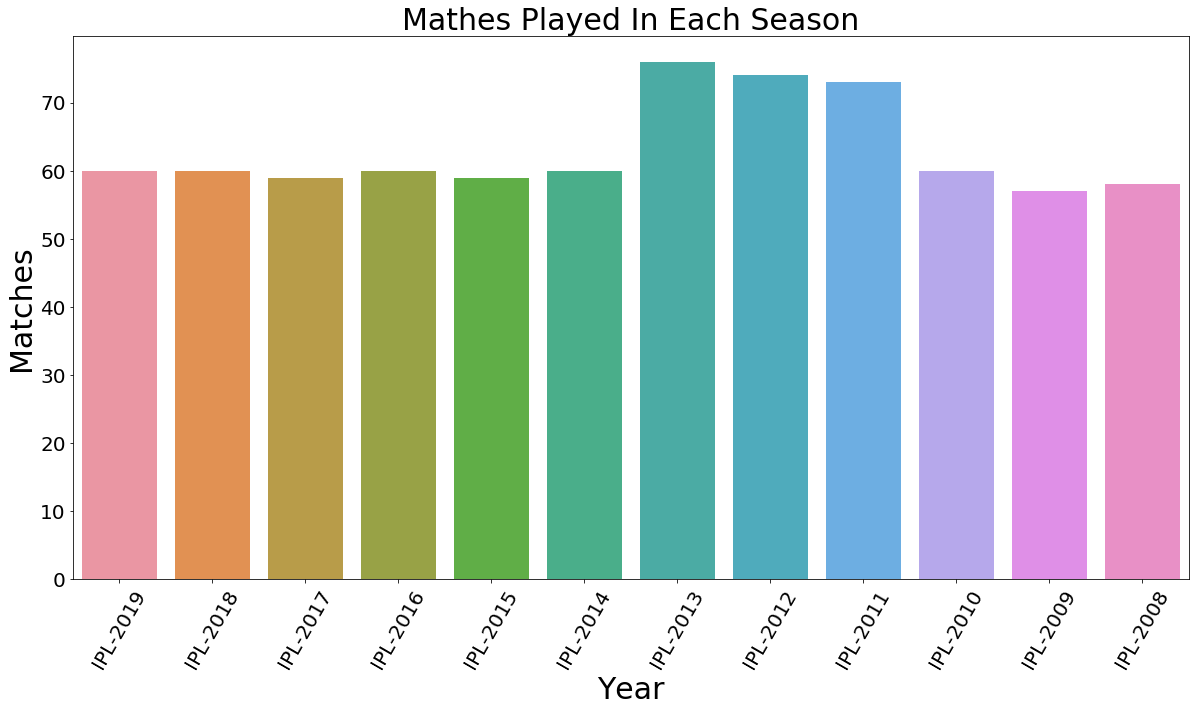

In [112]:
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontsize=30)
plt.xlabel('Season',fontsize=30)
plt.ylabel('Total Matches',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
sns.barplot(x='Year', y='Matches', data=season_df)

# We will find out now most preferred decision on winning toss

In [113]:
df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [115]:
decision_df = df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)

In [116]:
decision_df

,Decision,Total
0,bat,293
1,field,463


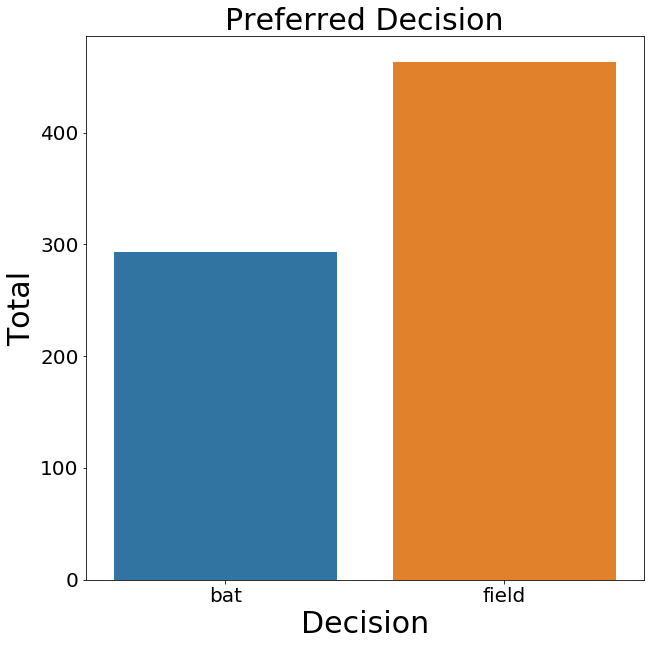

In [117]:
plt.figure(figsize=(10,10))
plt.title("Preferred Decision",fontsize=30)
plt.xlabel('Decision',fontsize=30)
plt.ylabel('Total',fontsize=30)
plt.tick_params(labelsize=20)
sns.barplot(x='Decision', y= 'Total', data=decision_df)

So fielding is the most preferable decision after winning a toss

# So now we will check which decision is more beneficial

In [120]:
field_df = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'), ['id', 'winner','toss_decision']]

In [121]:
field_df.count()

id               259
winner           259
toss_decision    259
dtype: int64

In [123]:
bat_df = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner','toss_decision']]


In [124]:
bat_df.count()

id               134
winner           134
toss_decision    134
dtype: int64

In [125]:
frames = [bat_df, field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df

,id
toss_decision,
bat,134
field,259


So we can conclude here that the team who chooses fielding have more chances of winning.

In [127]:
result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
result_df

,Decision,Total
0,bat,134
1,field,259


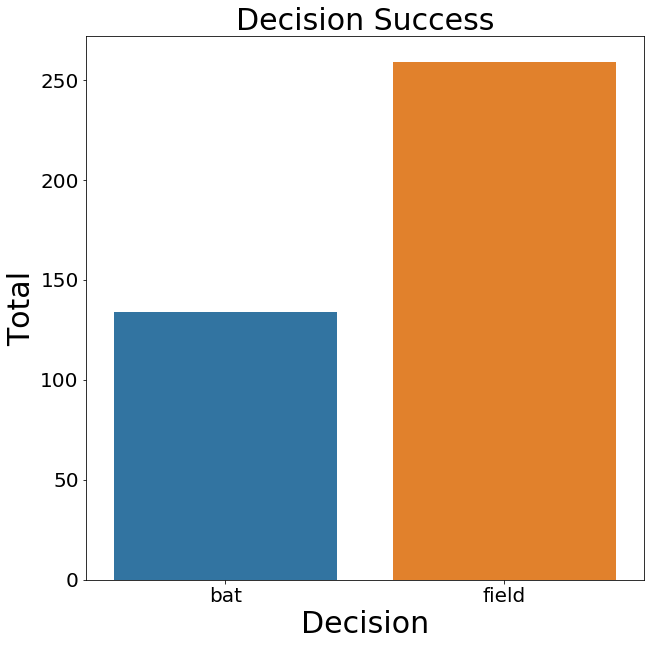

In [128]:
plt.figure(figsize=(10,10))
plt.title("Decision Success",fontsize=30)
plt.xlabel('Decision',fontsize=30)
plt.ylabel('Total',fontsize=30)
plt.tick_params(labelsize=20)
sns.barplot(x='Decision', y='Total',data=result_df)

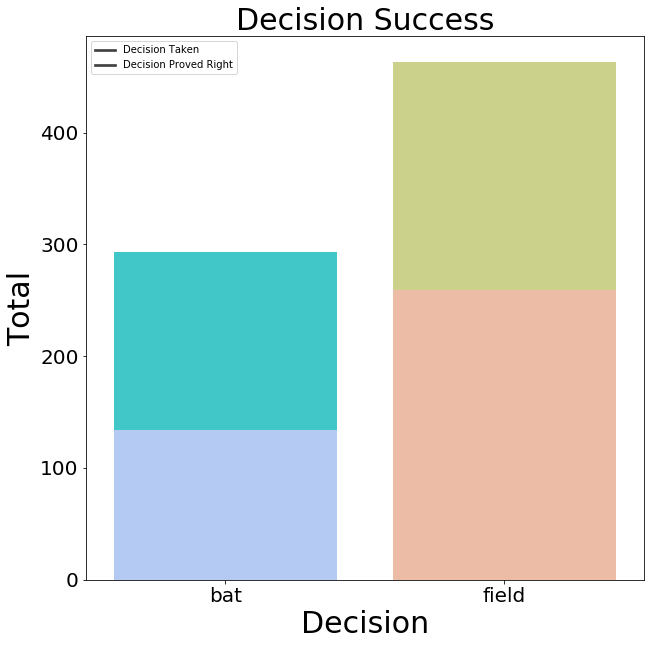

In [187]:
plt.figure(figsize=(10,10))
plt.title("Decision Success",fontsize=30)
plt.xlabel('Decision',fontsize=30)
plt.ylabel('Total',fontsize=30)
plt.tick_params(labelsize=20)
sns.barplot(x='Decision', y='Total', data=decision_df,palette='rainbow')
sns.barplot(x='Decision', y='Total', data=result_df, palette='coolwarm')
plt.legend(['Decision Taken','Decision Proved Right'])

# Venue which has hosted most number of matches

In [130]:
df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [133]:
len(df['venue'].unique())

41

In [134]:
venue_df = df.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id',ascending=False).reset_index()
venue_df.rename(columns={'id':'Total','venue':'Stadium'},inplace=True)

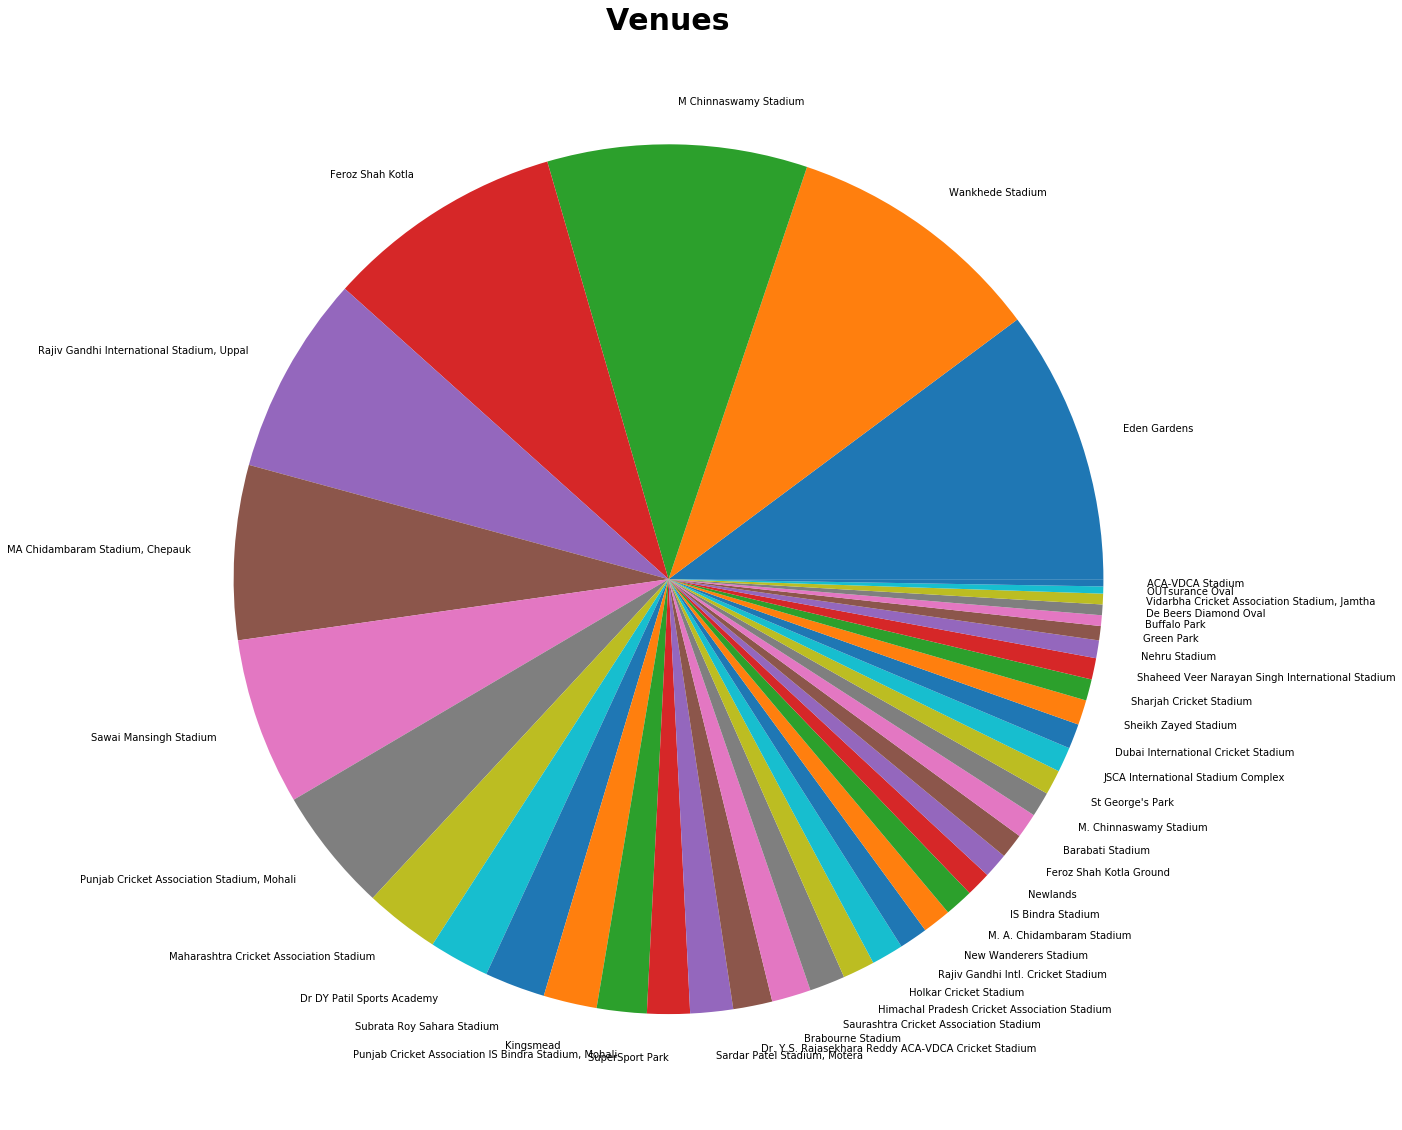

In [139]:
plt.figure(figsize=(20,20))
plt.title("Venues",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(venue_df['Total'],labels=venue_df['Stadium'],textprops={'fontsize': 10});

So we can conclude here that the most of the matches are played in Eden Gardens.

# So now we will find the player with maximum number of Man of the match award

In [193]:
len(df['player_of_match'].unique())

227

In [194]:
player_df= df.groupby('player_of_match')[['id']].count()

In [195]:
player_df

,id
player_of_match,
A Chandila,1
A Joseph,1
A Kumble,3
A Mishra,11
A Nehra,6
...,...
Washington Sundar,1
YK Pathan,16
YS Chahal,1


In [196]:
player_df=player_df.sort_values('id',ascending=False).reset_index()

In [201]:
player_df = player_df.head(15).copy()
player_df.rename(columns={'id':'Total_Awards','player_of_match':'Man_Of_the_Match'},inplace=True)
player_df

,Man_Of_the_Match,Total_Awards
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


In [198]:
player_df.head(10)

,Man_Of_the_Match,Total_Awards
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


In [199]:
import numpy as np

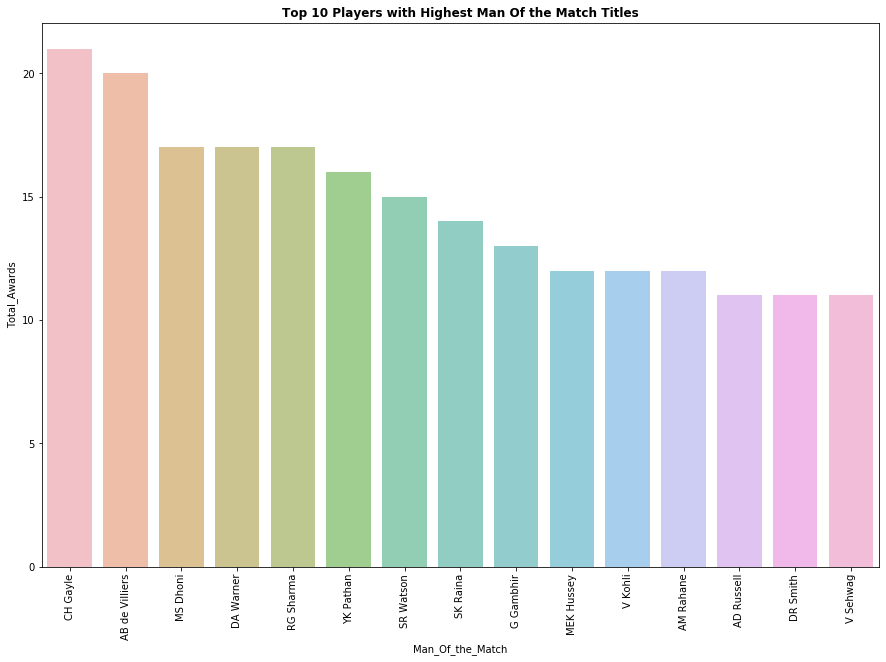

In [202]:
plt.figure(figsize=(15,10))
plt.title("Top 15 Players with Highest Man Of the Match Titles",fontweight='bold' )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players')
sns.barplot(x=player_df['Man_Of_the_Match'],y=player_df['Total_Awards'], alpha=0.6)

# Team who has won IPL Trophy most of times.

In [178]:
final_df=df.groupby('Season').tail(1).copy()
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium


In [179]:
final_df = final_df.sort_values('Season')
final_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [180]:
final_df.winner.unique()

array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [181]:
final_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

As now we can conclude here that Mumbai Indians have won maximum number of trophies

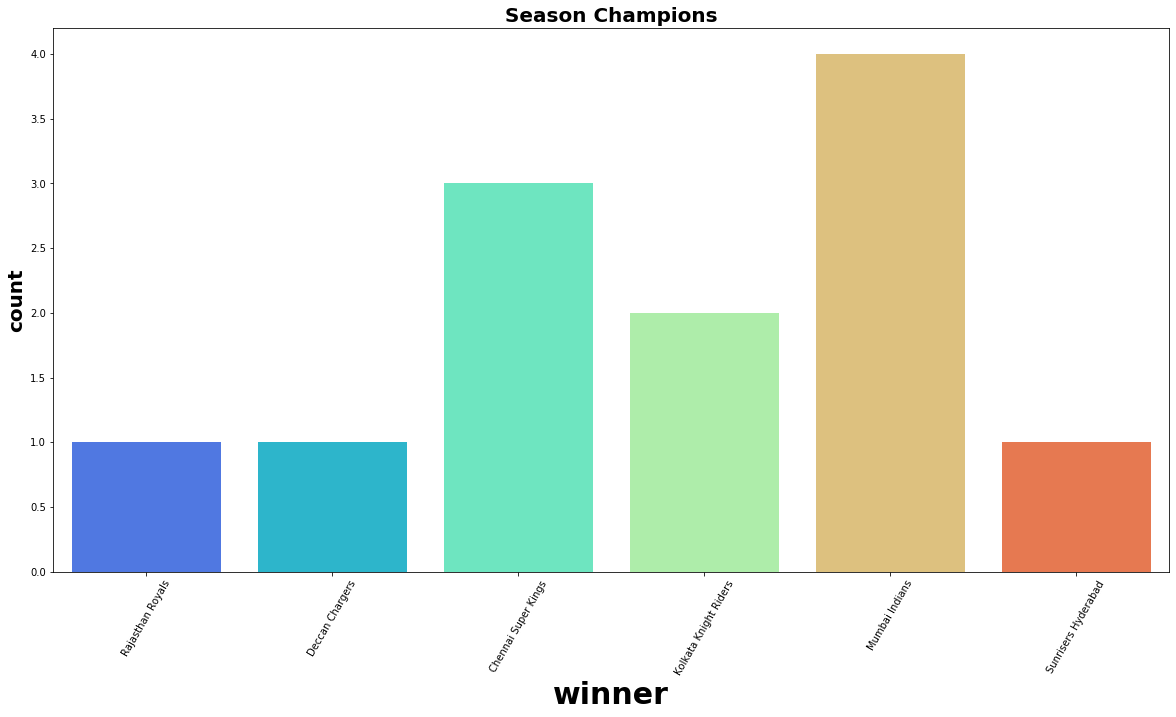

In [182]:
plt.figure(figsize=(20,10))
plt.title("Season Champions",fontweight='bold',fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Total Seasons',fontweight='bold',fontsize=20)
plt.xticks(rotation='60')
plt.tick_params(labelsize=10)
sns.countplot(x=final_df['winner'],palette='rainbow')

# Conclusion

This project simply implies that we have made this IPL data more readble and by using few visualization libraries it helped us to solve different problems which are difficult to handle. SO basically we have analysed data by cleaning and manipulating the required data which helped us to perform few task.